# Classification in ML

- It's a type of supervised learning where the goal is to categorize data into predefined classes
- The model is trained to predict the class lable of a given input data. e.g. Titanic (survived vs not survived), image classification for plants, Likelihood of foreclosure on mortgages
- Types:
    - Binary Classification: 2 classes/categories (o or 1 | True or False) e.g. Spam vs Ham emails
    - Multi-class Classification: more than 2 classes e.g. School grade A, B, C, D or Handwritten digits (0 to 9)
    - Imbalanced Classification: when the distribution of classes is not balanced/uniform, when some classes have much higher data points than other. e.g. Fraud detection (200 fraud vs 1Mil good transactions), anomaly detection
    - Ordinal Classification: A type of classification that the classes have a natural order. e.g. movie rating 1 to 5
    - Multi-label Classification: unlike multi-class classification, where each instance is assigned to 1 label, Multi-label is where an instance can belong to multiple classes/categories. e.g. A movie that belongs to multiple categories Action and SciFi
    - Hierarchical Classification: involves classifying data into a hierarchy, where classes are structures in tree-like format. e.g. Animal Family -> Genus -> Species 
- Common Algorithms:
    - Logistic Regression (Binary Classification)
    - Decision Trees 
    - Random Forest
    - Support Vector Machines (SVM)
    - k-Nearest Neighbor (kNN)
    - Naive Bayes 
    - Gradient Boosting Machines (GBM)


## Exercise - Classification and Model Evaluation Using SVM

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay 

In [2]:
path = '/Users/bassel_instructor/Documents/Datasets/'

df = pd.read_csv(path+'/heart.txt')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


- age
- sex (1 M and 0 F)
- chest pain type (4 values)
- RestBP: resting blood pressure
- Chol: serum cholestoral in mg/dl
- Fbs: fasting blood sugar > 120 mg/dl
- RestECG: resting electrocardiographic results (values 0,1,2)
- MaxHR: maximum heart rate achieved
- ExAng: exercise induced angina
- Oldpeak: ST depression induced by exercise relative to rest
- Slope: the slope of the peak exercise ST segment
- Ca: number of major vessels (0-3) colored by flourosopy
- Thal: thalassemia normal; fixed defect; reversable defect
- AHD (Target) Acquired Heart Disease

In [4]:
df['ChestPain'].value_counts()

ChestPain
asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       303 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [6]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [8]:
# get the avg age by AHD 
df.groupby('AHD')[['Age']].agg(['mean','median'])

Age       
          mean median
AHD                  
No   52.585366   52.0
Yes  56.625899   58.0

In [9]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.683168
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.944808
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


<Axes: xlabel='Age', ylabel='Chol'>

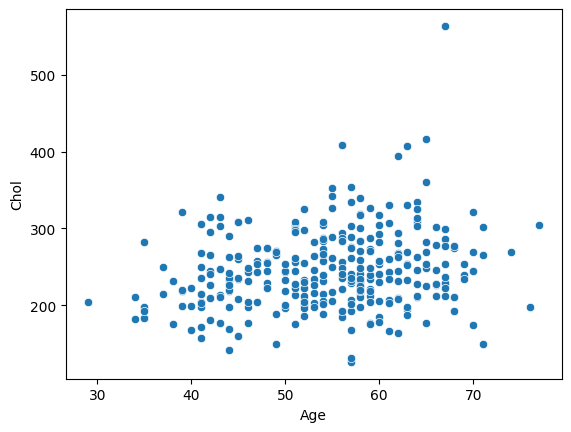

In [10]:
sns.scatterplot(data=df, x='Age', y='Chol')

In [11]:
df_org = df.copy()

In [12]:
df = pd.get_dummies(df, columns=['ChestPain', 'Thal'], dtype=int)

In [13]:
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0,No,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3,Yes,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2,Yes,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0,No,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0,No,0,0,1,0,0,1,0


In [15]:
# split the data
X = df.drop(columns='AHD', axis=1)
y = df['AHD']

In [17]:
#standardization
MMS = MinMaxScaler()

X_scaled = MMS.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

### Deploying SVM
- Support Vector Machines is powerful and common ML algorithm
- It can be sued for both regression and classification:
    - Support Vector Regressor (Regression)
    - Support Vector Classifier (CLassification)
- SVM searches for a hyperplane that best separates the classes in the feature space. It's also called decision boundry.
- Other components:
    - Support Vector: data points that are the closest to the hyperplane
    - Margins: the distance between the hyperplane and the support vectors